In [25]:
import numpy as np
import pandas as pd
from scipy.constants import Boltzmann, Planck, gas_constant
from scipy.integrate import solve_ivp
from plotnine import *

In [26]:
data = pd.DataFrame(
    [[1, 264500, 347.6, 110900], [2, 101900, 393.1, 97900], [3, 35600, 658.7, 92800]], columns=['step', 'Ea', 'Tf', 'dG'])
data

,step,Ea,Tf,dG
0,1,264500,347.6,110900
1,2,101900,393.1,97900
2,3,35600,658.7,92800


In [27]:
def kEyr(dG, T):
    return T*Boltzmann/Planck * np.exp(-dG/(gas_constant*T))

def kArr(Ea, Tf, T):
    return np.exp(Ea/gas_constant * (1/Tf - 1/T))

In [28]:
T = 273+25
data['ln_kEyr(25)'] = np.log(kEyr(data['dG'], T))
data['ln_kArr(25'] = np.log(kArr(data['Ea'], data['Tf'], T))
data['k'] = kArr(data['Ea'], data['Tf'], T)
data['t1/2 /h'] = np.log(2)/kArr(data['Ea'], data['Tf'], T) / (60*60)
data

,step,Ea,Tf,dG,ln_kEyr(25),ln_kArr(25,k,t1/2 /h
0,1,264500,347.6,110900,-15.302003,-15.232709,2.423922e-07,794.336057
1,2,101900,393.1,97900,-10.055223,-9.949499,4.775156e-05,4.032138
2,3,35600,658.7,92800,-7.996870,-7.867885,3.828431e-04,0.502924


In [29]:
def rhs(t, y):
    r = np.array([
        -y[0]*data['k'][0],
        y[0]*data['k'][0] - y[1]*data['k'][1],
        y[1]*data['k'][1] - y[2]*data['k'][2],
        y[2]*data['k'][2]])
    return r

t_final = 10*60*60
sol = solve_ivp(rhs, [0, t_final], [0,0,1,0], method='LSODA', t_eval=np.linspace(0, t_final, 1000))

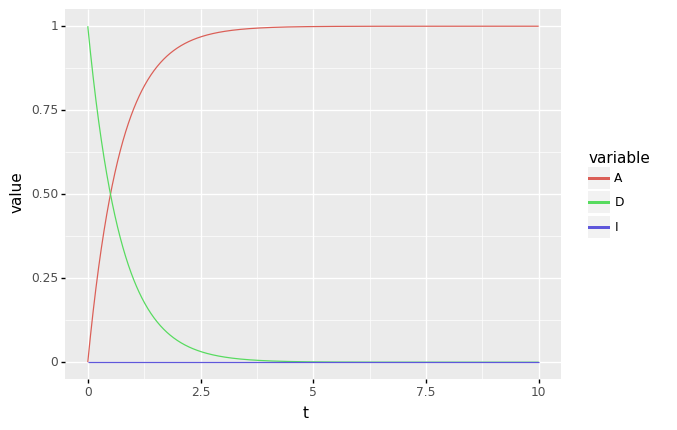

<ggplot: (8746739818698)>

In [30]:
s = pd.DataFrame({'t': sol.t/60/60, 'N': sol.y[0,:], 'I': sol.y[1,:], 'D': sol.y[2,:], 'A': sol.y[3,:]})
(
    ggplot(s[['t', 'I', 'D', 'A']].melt('t'), aes(x='t', y='value', colour='variable')) +
    geom_line()
)